# This notebook demonstrates the teleportation: transfering the quantum information carried by one qubit to another. The derivation follows the famous textbook "Principles of Quantum Computation and Information."   

In [43]:
from qiskit import *
from math import pi

In [2]:
IBMQ.load_accounts()

In [3]:
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_vigo') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_ourense') from IBMQ(ibm-q, open, main)>]

In [122]:
# declare a circuit
q=QuantumRegister(3,'q')
c=ClassicalRegister(3,'c')
cir=QuantumCircuit(q,c)

Below, I will perform the gate operations for teleportation. The statevector of qubit 0 will be transferred to qubit 2. This is achievable when qubit 1 and qubit 2 are entangled.      
Step1: Encode a state in q0, here let the statevector be 0+1.     
Step2: Create an entangled state (01+10) on q1 and q2.      
Step3: Transform q0 and q1 to computational basis.       
Step4: Perform measurement on q0 and q1.       
Step5: According to the measurement outcome from Step4, perform the corresponding gates on q2.        
In constructing circuit, I will add a barrier after each step for clarity. 

In [123]:
#step1
cir.h(q[0])
cir.barrier()
#step2
cir.h(q[1])
cir.x(q[2])
cir.cx(q[1],q[2])
cir.barrier()
#step3
cir.cx(q[0],q[1])
cir.h(q[0])
cir.barrier()
#step4
cir.measure(q[0],c[0])
cir.measure(q[1],c[1])
cir.barrier()
#step5
# if q0's outcome is 1, that means q2 is in (0-1) state, such that we'd convert back to (0+1)
cir.cz(q[0],q[2])
cir.barrier()
# transform the (0+1) state to the computational basis
cir.h(q[2])
cir.measure(q[2],c[2])

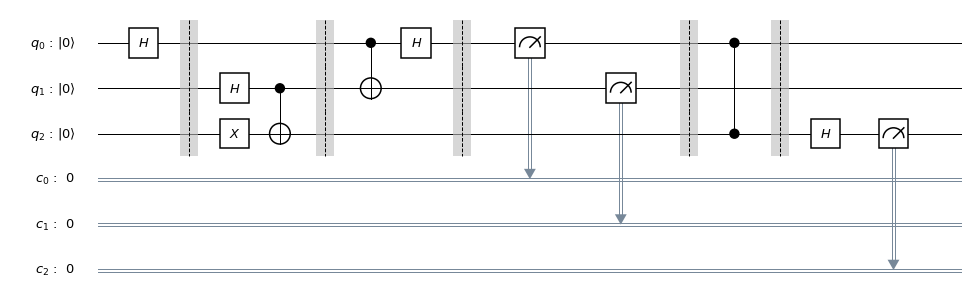

In [124]:
cir.draw(output='mpl')

In [125]:
jobs=execute(cir,backend=Aer.get_backend('qasm_simulator'),shots=1024)

In [126]:
jobs.result().get_counts()

{'000': 266, '011': 252, '001': 252, '010': 254}

It is shown from the outcome that q2 is always '0', i.e. before the H gate, q2 is in the state (0+1). This is the initial state of q0. After teleportation, the initial statevector of q0 is now encoded in q2. 